<a href="https://colab.research.google.com/github/heejininku/Class2022Spring/blob/main/2022S11_scikit_learn_ipynb_(3.30_4.4_%EC%88%98%EC%97%85%EC%A0%95%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

x = np.array([1,2,3,4])
y = x.reshape(2,1,2)
y

array([[[1, 2]],

       [[3, 4]]])

머신러닝에서 요즘 가장 핫한것이 딥러닝인데 딥러닝 제외하고 가장 대표적인 것임.



# Scikit-Learn for machine learning

### Understanding iris data

In [ ]:
import seaborn as sns #seaborn 이라는 패키지-> stat plotting (통계 그래프 등) stat 관련 시각화 하는데에 많이 사용하는 것.
df = sns.load_dataset('iris') #뜻이 붓꽃 #너무 유명한 데이터인 iris 임. 지겨울 정도로 많이 사용함
#딥러닝할 때 많이 사용하는 데이터로 digit 가 있기도 함. (숫자 필기체 관련임)

In [ ]:
type(df) #데이터프레임인 것

pandas.core.frame.DataFrame

구글에 그냥 iris를 검색해서 어디가 petal 인지, 어디가 sepal 인지 확인해봄

petal은 꽃잎 부분, sepal 이 꽃받침 부분

전문가라면 알 수 있겠지만, 전문가가 아닌 사람은 모를 것임  따라서 수치에 대한 패턴을 기계에게 학습시키는 것.

오늘 우리의 목적이 무엇이냐면 이 iris 데이터를 가지고 supervised와 (regression- 데이터의 일부를 예측해볼 수 있다. sepal_length를 가지고 sepal width를 예측하는 등등), classification- species 가 사실상 카테고리 정보임. output에 나오게 할 수 있음.-> 4개의 값을 모두 입력으로 넣어주는 것이 이상적임.)unsupervised- (dimensionality- PCA 이용해서 출력부분 없이 지금 여기가 4차원인데 차원을 줄일 수 있음.clustering-GMM 을 사용해서 묶이게 할 수 있음)를 모두 다 해볼 것임. 

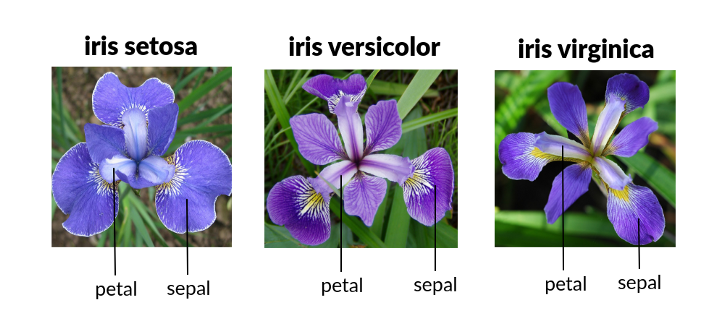

In [ ]:
df #이렇게 하면 전체 다 나오게 된다. #iris-> 150개의 붓꽃을 채집해서 종류가 3가지가 있음. (setosa, virginica, versicolor)-> 50개씩 존재함.
#데이터프레임 지금 엑셀파일 인것.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.head() #교수님은 이 셀 지우고 수업 안하심

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'].unique() #df['species'] 이렇게만 치면, species 칼럼만 나오는 것, 근데 뒤에 .unique() 이렇게 적으면 이 값들 중에서 unique 한 값만 나옴.

array(['setosa', 'versicolor', 'virginica'], dtype=object)

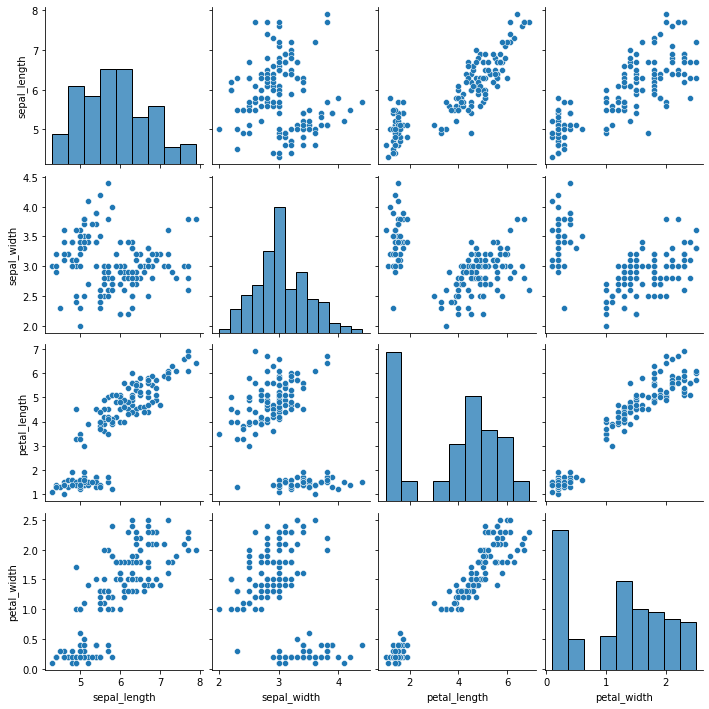

In [ ]:
sns.pairplot(df) #df를 그냥 넣으면 숫자정보 sns.pairplot (칼럼끼리 pairwise 해준다.-> 그림을 잘보면 중복되는 쌍이 있기에 가려서 볼 수 있음.)

지금 위에서 pairwise 된 것을 보면, 그림이 그닥 예쁘지가 않음.
따라서, 종별로 색깔을 따로 해서 하고 싶을 때는 아래처럼 hue='species' 를 붙이기.

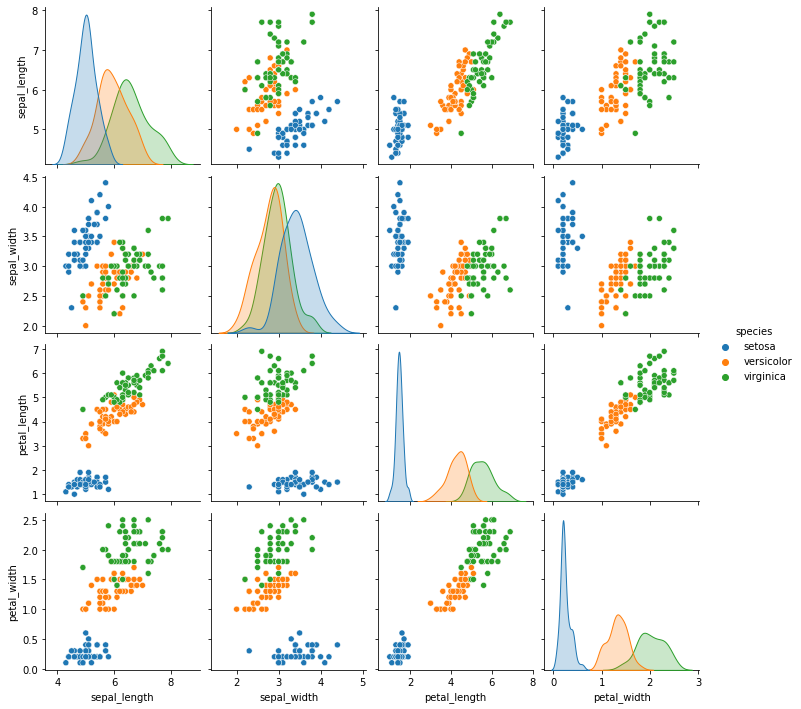

In [ ]:
sns.pairplot(df, hue='species')

그런데 지금까지는 df를 그냥 pairplot에 뚝 밀어넣은 상황
이 방식말고 원하는 것만 따로 뜯어서 plotting 할 수는 없을까? 할수 있음.


In [ ]:
x = list(df['sepal_length']) #이 칼럼만 150개를 가져오는 것 근데()해서 list로 가져온 것임. 
y = list(df['sepal_width'])

Text(0, 0.5, 'sepal_width')

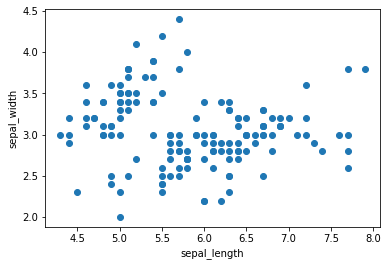

In [ ]:
import matplotlib.pyplot as plt #matplotlib를 가져올 것-> pyplot부분을 plt해서 사용할 것. (plotting을 하기 위해서)
plt.scatter(x, y); #각각이 다 페어가 되어있음. 순서대로 나열이 되어있다고 생각. 한 페어가 x,y 공간에 한 점을 만들것. (총 150개의 점이 찍힐 것.)
#한 마디로 위처럼 다 등장하게 할 필요 없이 그냥 찍어서 가져올 수 있다는 말 (내가 정리한 말임)
plt. xlabel('sepal_length') #축에 이름을 label해준 것.
plt. ylabel('sepal_width') #축에 이름을 label해준 것.


Text(0.5, 1.0, 'setosa')

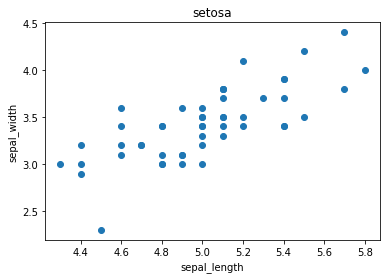

In [ ]:
df_setosa = df[df['species']=='setosa'] #아까는 species 까지 했지만 뒤에 ==(두개해야지 equal임 =은 assign)'setosa'인 것만 골라서 선택해라
#시험문제로!! 위의 상황이 몇 바이 몇 이 되는지 shape 정보 (50,5) 같은 것이 나올 수 있음.
x = list(df_setosa['sepal_length']) #그 중에서 또 뽑아서 리스트로 하나는 x
y = list(df_setosa['sepal_width'])  #그 중에서 또 뽑아서 리스트로 하나는 y
#결국 위의 그래프의 일부가 나오게 된 것임.
plt.scatter(x, y);
plt.xlabel('sepal_length') #여기서부터 아래 3줄은 어차피 labeling (내 정리표현임)
plt.ylabel('sepal_width')
plt.title('setosa')

### Supervised learning: regression-> 
숫자를 예측하는 것(숫자가 결과로 나오면 다 regression이다. 
###(linear regression)-> 더하기하고 곱하기 밖에 존재하지 않음.
따라서 y=ax+b 같은 형태 (일차함수)

그 이외의 삼각함수, 이차함수, 로그함수는 not linear regression 이라고 함. (곡선을 만들어 내는 아이들임. 선을 아니라는 의미로)

In [ ]:
from sklearn.linear_model import LinearRegression #install 없이 import만 하면 된다.

In [ ]:
model = LinearRegression(fit_intercept=True) #intercep은 y절편이라는 의미- 이것을 고정하자
#모델을 우선 설정하는 것

In [ ]:
import numpy as np
#위에서 이미 x,y를 설정한 상태임. 가장 위에서 가까이에 있는 x는 sepal_length이고 y는 sepal_width
#(총 50개의 입력데이터, 출력값 -즉, 50개의 숫자값으로 입출력이 나와있는 상태)
#리스트의 형태로 되어있는 상태인데 머신 러닝 등에서는 nd array 형태로 바꾸어야 한다.
#아래는 리스트를 array로 바꾸는 상황
x = np.array(x)
y = np.array(y)

In [ ]:
print(x)
print(x.shape)
print(y)
y.shape

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
(50,)
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]


(50,)

In [ ]:
#여기서부터는 약간의 테크닉이 필요함.
#지금 x가 1d array 인데 2d array 로 바꾸어야 함.(왜냐하면 이 모델은 2d array를 데이터 형식으로 받기 때문-multiple regression을 하기위해)
X = x.reshape(-1, 1) #(50,1)이면 길이가 5이고 가로가 하나인 상황 (25,2) (2.25)이런 식으로 shape을 여러가지로 바꿀 수 있음/ 3차원으로 (5,5,2) 이렇게 해도 된다.
#-1을 쓰면 뒤에 1은 맞춰주되, 앞의 -1의 의미는 너가 알아서 계산해라. (당연히 50인데 계산을 시키는 의미) (5,-1) 이렇게 쓰면 (5,10) 한 것과 같음.
#-1을 쓰면 unknown일 때, 또는 한쪽은 너가 계산해라 라는 의미
#numpy에서 reshape이 매우 중요함.
X.shape

(50, 1)

In [ ]:
model.fit(X, y) 
#fit 이라는 말에 익숙해져야 함- 데이터가 퍼져 있을 때 가장 딱 지나가는 선을 구하는 것 y=ax+b 이런식으로 틀을 model이라고 함.(a와b가 뭔지는 모르지만)
#그런데 a,b를 구하는 게 fit임. 지금 내부적으로는 아래의 그래프의 선이 (a,b 값이) 설정이 된 것임
#a,b 가 어떻게 설정되었는지는 아래의 두 셀을 보면 알 수 있음.

LinearRegression()

In [ ]:
model.coef_ #coef가 계수라는 의미-> 기울기를 알려줌. (a 값)

array([0.7985283])

In [ ]:
model.intercept_ #y절편, (b 값) # 결국 model의 식 값은 y=0.7985283x-0.569432673039648

-0.569432673039648

In [ ]:
xfit = np.linspace(4, 6) #linspace는 배웠음- 4에서 6까지 숫자 중에서 등차가 똑같이 나게 만들어주는 것(내 정리임)
#그런데 여기서는 default 값이 50이기에 (4,6,50)과 (4,6)이 동일한 의미
xfit

array([4.        , 4.04081633, 4.08163265, 4.12244898, 4.16326531,
       4.20408163, 4.24489796, 4.28571429, 4.32653061, 4.36734694,
       4.40816327, 4.44897959, 4.48979592, 4.53061224, 4.57142857,
       4.6122449 , 4.65306122, 4.69387755, 4.73469388, 4.7755102 ,
       4.81632653, 4.85714286, 4.89795918, 4.93877551, 4.97959184,
       5.02040816, 5.06122449, 5.10204082, 5.14285714, 5.18367347,
       5.2244898 , 5.26530612, 5.30612245, 5.34693878, 5.3877551 ,
       5.42857143, 5.46938776, 5.51020408, 5.55102041, 5.59183673,
       5.63265306, 5.67346939, 5.71428571, 5.75510204, 5.79591837,
       5.83673469, 5.87755102, 5.91836735, 5.95918367, 6.        ])

In [ ]:
Xfit = xfit.reshape(-1, 1) #2d array로 만들어주는 과정임.
yfit = model.predict(Xfit) 
#중요! 아까 나온 y=0.7985283x-0.569432673039648 이 식에 x값들을 다 넣고 y값이 생기는 것 (predict는 만들어진 모델에 x값을 넣는 것)
#시험문제 나올 수 있음. x fit은 2d array해서 (50,1)이다. 그럼 y fit의 dimension은? -> 1d로 (50)개다~

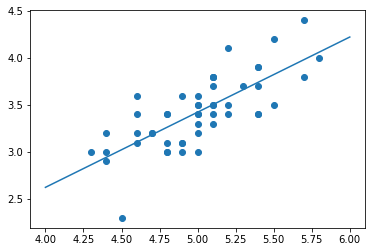

In [ ]:
#점까지는 아까했지만, 우리는 점들을 관통하는(한 가운데를 지남) 하나의 선을 그리고 싶을 때 linear estimation이라고 함. 
#직선이기에 linear라고 함.linear regression (또는 function)
#y=ax+b의 구조인데 a,b를 알고 싶을 때 위를 보면 알 수 있음. (교수님이 결과값을 먼저 보여주시고 과정을 알려주심.a,b는 model.fit하면서 형성되었음.)
plt.scatter(x, y) #x,y의 원래 값
plt.plot(xfit, yfit); #여기서 (xfit, yfit,'.')이렇게 한다면 저기 model이 선이 아닌 점들로 이어져 있을 것.

결국 y=ax+b를 하면 좋은 이유는 그 자체가 이미 regression model이기 때문이다.
50번째의 꽃까지 있는데 51번째의 꽃이 발생해서 legth를 넣으면 width를 예측할 수 있는 상황이 되기 때문에

정리하자면 regression은 이 선을 구하는 것이다. (더 구체적으로는 이 선의 a,b값을 구하는 것이다.) 


correlation: 얼마나 이 선에 붙어있는지를 표현하는 것. 중간 선을 그리고 선을 중심으로 딱 붙는지, 두루뭉실한지가 나옴.r은 딱 붙은 케이스가 더 크다.

In [ ]:
df_setosa.corr() 
#지금여기서도 0에 가까운 게 corr이 낮고(예를 들어서 sepal_width와 petal_length는 관계가 낮음)/ 같은 조건 두개는 어차피 같은 값이니 1이 등장함. 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


#### gradio implementation

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
def test (x): #한 함수를 만들고 있음.
  X = np.array(x).reshape(-1,1) #하나의 숫자값을 받아서 reshape하고 있었음.숫자를 하나만 줄 것임.
  #숫자를 주면 2d array로 바뀌고 그 x를 model.predict 안에 넣으면 y로 뱉게 됨.
  #지금 여기 값들은 위에서 regression 한대로 예측시스템을 만드는 것임.
  y = model.predict(X)
  return y[0]

iface = gr.Interface(test, inputs = ["number"], outputs = ["text"])
iface.launch(debug=True) #(debug=True)이거 없어도()만 해도 잘 되지만, 이 말의 의미는 잘 안될 때 에러메시지를 뱉어내라는 의미임.

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://49060.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7ff2a7cd1910>,
 'http://127.0.0.1:7860/',
 'https://49060.gradio.app')

### Supervised learning: classification -> 카테고리를 인지하는 것-출력값이 카테고리임 (Naive Bayes)-다른 종류도 많지만 대표적인 알고리즘.

classification 에는  super
regression의 대표적인 linear regression 인데

그 대신에 classification 하는 데에 대표적인 것으로는 logistic regression 이 있고, Naive Bayes, SVM(support vector machine) 이런 식으로 있음-> 그러나 3개보다 요즘에는 딥러닝 때문에 NN (Neural Net)을 많이 사용하는 추세

In [ ]:
x = df.drop('species', axis=1) # axis = 0 (delete row) / 1 (delete column)
#iris 데이터에서 species를 뺀 것임.
x.shape

(150, 4)

In [ ]:
y = df['species'] #카테고리만 남기는 것
y.shape

(150,)

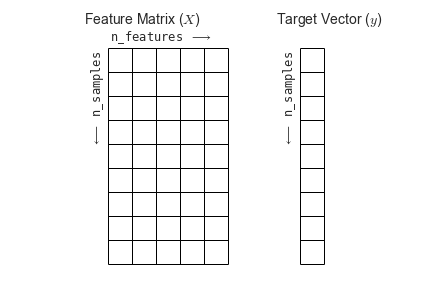

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y) #split하는 것이 아마 75%로 쪼개는 특성이 있어서 마우스 갖다대보면 112개가 test인 거 확인가능
 #데이터를 쪼갰음.
 #일부는 test로 해서 test해보고, 일부는 train(사실상,훈련용 데이터)- model fit하는 데에 사용하려고(fit한다는 말이 모델을 훈련시킨다는 말과 동일함.)

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class 
model = GaussianNB()                       # 2. instantiate model (모델을 메모리에 올려놓는다)
model.fit(Xtrain, ytrain)                  # 3. fit model to data (fit하는 것은 상상으로 y=ax+b에서 a,b 계수 정한다~ 이렇게 생각하기-조금 다르지만)
                                           # 이 계수들을 이 데이터로 부터 fit해라. xtrain이 된 이유는 위의 셀

GaussianNB()

In [ ]:
yout = model.predict(Xtest)                # 4. predict on new data (model이 만들어진 이후에 test할 때는 Xtest 같이 test로)
#model이 만들어졌으니까 a,b는 정해진 것이고 이제 여기에 x값만 넣으면 되는데 x값에서 Xtest (38개의 데이터)를 넣음
#이 상태에서는 Ytest는 사용할 필요가 없음-predict할 때는 x값만 넣고, y값은 얼마나 잘 맞았는지 비교해보면 된다.(아래 셀을 참고)
#yout이 이 셀을 통해 만들어진 것이고 그것을 원래의 ytest와 비교해보면 된다.

In [ ]:
from sklearn.metrics import accuracy_score #얼마나 이 모델이 잘하는지 평가해주는 것.
accuracy_score(ytest, yout) #yout은 모델이 예측한 값이고, ytest는 실제 데이터에 들어있는 정답값

0.9210526315789473

#### gradio implementation

In [ ]:
import pandas as pd
def test (in1, in2, in3, in4):
  data = {'sepal_length': [in1],
        'sepal_width': [in2],
        'petal_length': [in3],
        'petal_width': [in4]}
  Xtest = pd.DataFrame(data)
  yout = model.predict(Xtest)
  return yout

iface = gr.Interface(test, inputs = ["number", "number", "number", "number"], outputs = ["text"])
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://20767.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7ff2a7cd1910>,
 'http://127.0.0.1:7860/',
 'https://20767.gradio.app')

### Unsupervised learning: dimensionality (PCA)
PCA 는 유명함 principal component Analysis임 -> 경제,경영, 통계에서 많이 배움.


첫번째 그림은 3차원임.그 공간 속 한 점을 픽해보면 (0.0.0)으로 나와있을 것임.

이걸 3차원 vector라고 함. ->3d array와 같은 말

우리가 살펴보고 있는 iris 데이터는 숫자쌍이 4개이니, 4차원을 상상하기


3차원 공간을 입체적인 cloud라고 생각해보자!!!
축들의 각도를 유지하면서 (orthogonal-직각)-1. 두번째 그림처럼 원점을 이동시키기 2. rotate을 잘 시켜서 가장 이 데이터를 잘 관통하도록 하기
(그 상태를 두께가 있는 원반에 축이 있다고 생각을 해보기- 교수님 그림보기)
여기서 큰 거 두 개인 pc1, pc2만 살린다. (pc3는 값이 작으니 무시)
(축에서 꽉 눌러버리는 느낌)

결국 3차원에서 2차원으로 차원축소가 된다.

차원축소의 이유는? -> 매우 중요한 역할을 함.
예를 들어서 국,영,수,과 성적을 가진 사람이 있다고 생각해보자
이것을 차원을 축소해서 상위 2차원만 선택을 해본다. 그럴 때 pc1,pc2를 해석해야하는데 pc1은 언어능력, pc2는 수리능력으로 말할 수 있는 것임.(국어, 영어는 같이 많이 가고, 과학, 수학은 같이 많이 갈테니)
이런 과정을 통해서 가진 능력을 추상화할 수 있는 효과
데이터분석, 머신러닝에 유용한 역할을 한다.


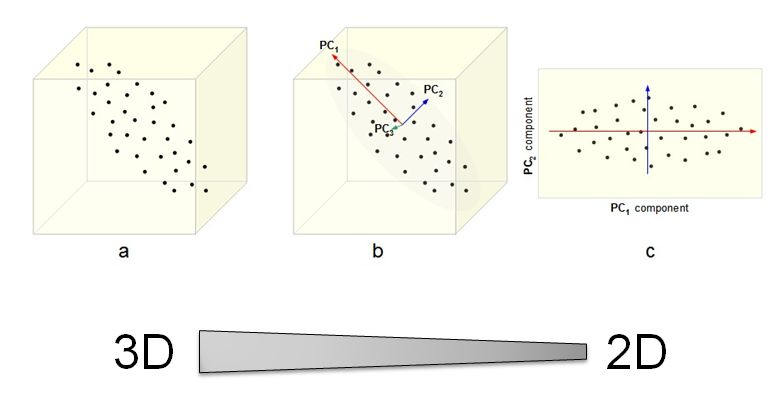

In [ ]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters #공통적인 것 상위 2개만 보겠다고 설정하고 model 올려놓기
model.fit(x)                           # 3. Fit to data. Notice y is not specified! #SL과 달리 x만 쓰는데 이거 하나가 4차원임.
#원래 x에는 4가지가 있었음, (위의 x) --그런데 아래의 X_2D는 그냥 다른 pc1, pc2 같은 것들이 있구나라고 생각하면 된다.
X_2D = model.transform(x)              #세번째 그림의 값들이 만들어진다. 원래 첫번째 그림의 상황인데

In [ ]:
df['PCA1'] = X_2D[:, 0] #칼럼에 담아주고 있음.
df['PCA2'] = X_2D[:, 1]
df

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


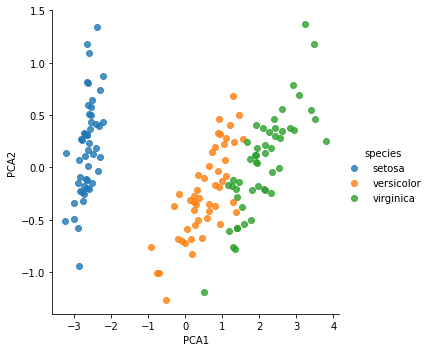

In [ ]:
sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False); #데이터는 df를 썼는데pc1,pc2를 plot을 한 것.#hue='species'는 종별 색깔구분
#그림에서 c번 그림과 같은 상황인 것.

### Unsupervised learning: clustering (GMM)
Goussion Mixture Model이다. 

https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2021-02-08-GMM_and_EM/pic1.mp4


1차원의 데이터- 히스토그램임- x축에만 데이터가 있음.
히스토그램에서 높은 층을 차지 하는 칸은 데이터가 그 칸에 많다는 의미임.

영상보면 빨간색과 초록색 정규분포가 움직인 다음에 fit해버림.

1차원 상의 데이터를 잘 봤더니 데이터가 모여있는 구간들이 있어서 그것을 cluster되어있더라~ 이렇게 표현할 수 있을 것.
4차원에서도 가능함. (무리로 쪼개라~하면 쪼갤 것임)
어떻게 가능한지 clustering에서 보면 된다.

In [ ]:
from sklearn.mixture import GaussianMixture as GMM   # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')  # 2. Instantiate the model with hyperparameters 
#우리가 3가지의 무리가 있을 것이라는 것을 아니까~(종별로) 아마도 3개의 덩어리라고 표시를 해준 것. 그래서 모델 만들고
model.fit(x)                                         # 3. Fit to data. Notice y is not specified! #이 줄에서 정규분포가 찾아가는 과정이 실행이 되는 것임.
#여기도 y가 안들어감. model.fit할 때 (그러니까 unsupervised)
y_gmm = model.predict(x)                             # 4. Determine cluster labels

In [ ]:
y_gmm #총 150개의 4개의 숫자값이 있음. (4x150)-그런데 y_gmm이 grouping을 해주는 것. 마치 한 꽃 별로 너는 0,1,2 중 무엇이야~라고 나눈 것.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df['cluster'] = y_gmm

In [ ]:
df #옆에 진짜 정답값(species)라고 써 있는 것과는 무관하게 cluster를 한 것임.

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,2
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,2
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,2
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


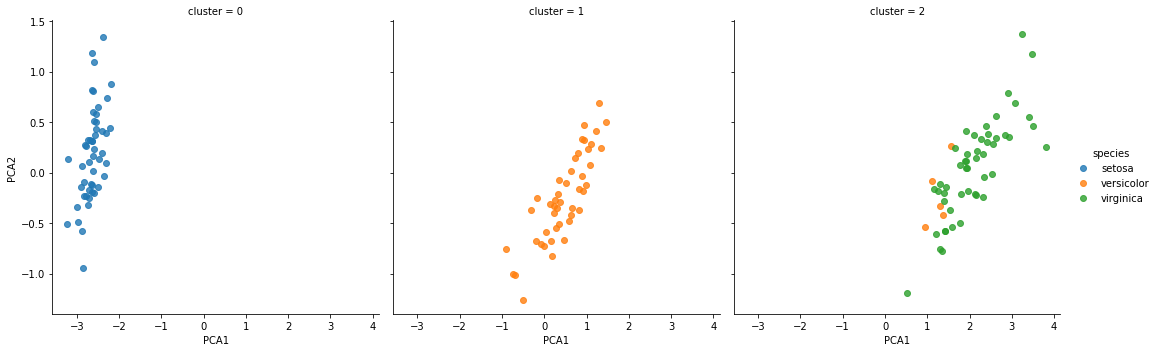

In [ ]:
sns.lmplot("PCA1", "PCA2", data=df, hue='species', col='cluster', fit_reg=False); 
#위랑 똑같이 pca1,pca2 로 나눈 것은 맞는데 col='cluster'-> 의미는 클러스터별로 나누었다는 의미